# Gradient descent

Gradient descent is a method of finding a minimum of a function.
It does so by "moving" in direction of descent specified by a derivative in the given point.

**Sloppy explanation** Given a point $x$, we check the value of the derivative of the function $f$ in point $x$. This gives us a direction to choose next point $x_\mathrm{next}$ such that we expect $f(x_\mathrm{next})$ to be smaller. We choose $x_\mathrm{next}$ based on where we are right now $x$, direction and magnitude of descent $f'(x)$ and a step $\alpha$.

$\alpha$ parameter regulates the size of the step.
We multiple alpha by the value of the derivative in the given point.
The derivative in a point tells us how steep in the curve at the point.

**Question**: Why do we need $\alpha$?

It seems that without $\alpha$ the value of the gradient is too big and we overshoot the minimum and diverge :confused:

**Question**: Why can't we just set alpha and only use the sign of the derivative? Since we just need to know in which direction to move?

In this case, we succeded only if we get the step correctly. In the example below, the only value for $\alpha$ that works in this case is $\alpha = 0.5$, since we start at $-2.0$. In all other cases, how ever small they are we are most likely to never reach the minimum.

**Question**: Why should $\alpha \in (0,1)$?

If $\alpha <= 1$ the process diverges (in case of symmetric quadratic function) and we can't reach minimum ever.

In [1]:
import numpy as np

def f_1D(x):
    return np.power(x,2);

def jacobian(x):
    ## jacobians for x^2
    return 2*x;

alpha = 0.1;
error = 1000;
x_prev = -2.0;
opt_way = []
numOfIter =0;
while error >1e-05: 
#     x_opt = x_prev - alpha *np.sign(jacobian(x_prev)); # just using sign of the derivative
    x_opt = x_prev - alpha *jacobian(x_prev); # using value of the derivative and step
#     x_opt = x_prev - jacobian(x_prev); # just using derivatives have huge steps that overshoot minimum
#     print("Step is: ",jacobian(x_prev))
    error  = abs(x_prev -x_opt);
    x_prev = x_opt;
    opt_way.append(x_opt)
    numOfIter+=1;
print("Converged with ", numOfIter, "iterations\n")

Converged with  49 iterations



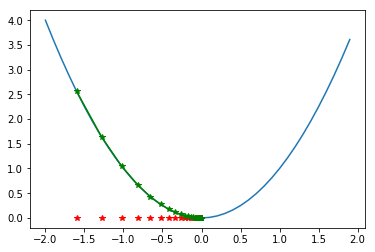

In [3]:
import matplotlib.pyplot as plt

x = np.arange(-2.0,2.0,0.1)

plt.figure(1)
plt.plot(x,f_1D(x))
y = np.zeros((len(opt_way),1))
plt.plot(opt_way,y, 'r*')
plt.plot(opt_way, f_1D(opt_way), 'g*-')

plt.show()

## Two dimensional case

In [4]:
# Function: x^2 + y^2
def f(x,y):
    return np.square(x) + np.square(y);

def jacobian(x,y):
    return np.array([2*x, 2*y])



alpha = 0.1;
error = 1000;
x_prev = [-2.0, 2.0];
opt_way = []
numOfIter =0;
while error >1e-05:
#     print("Step is: ", alpha *jacobian(x_prev))
#     x_opt = x_prev - alpha *np.sign(jacobian(x_prev)); # just using sign of the derivative
    x_opt = x_prev - alpha *jacobian(x_prev[0], x_prev[1]); # using value of the derivative
    error  = np.linalg.norm(x_prev -x_opt);
    x_prev = x_opt;
    opt_way.append(x_opt)
    numOfIter+=1;
print("Converged with ", numOfIter, "iterations\n")
opt_way = np.array(opt_way)
# print(opt_way)

Converged with  51 iterations



<IPython.core.display.Javascript object>


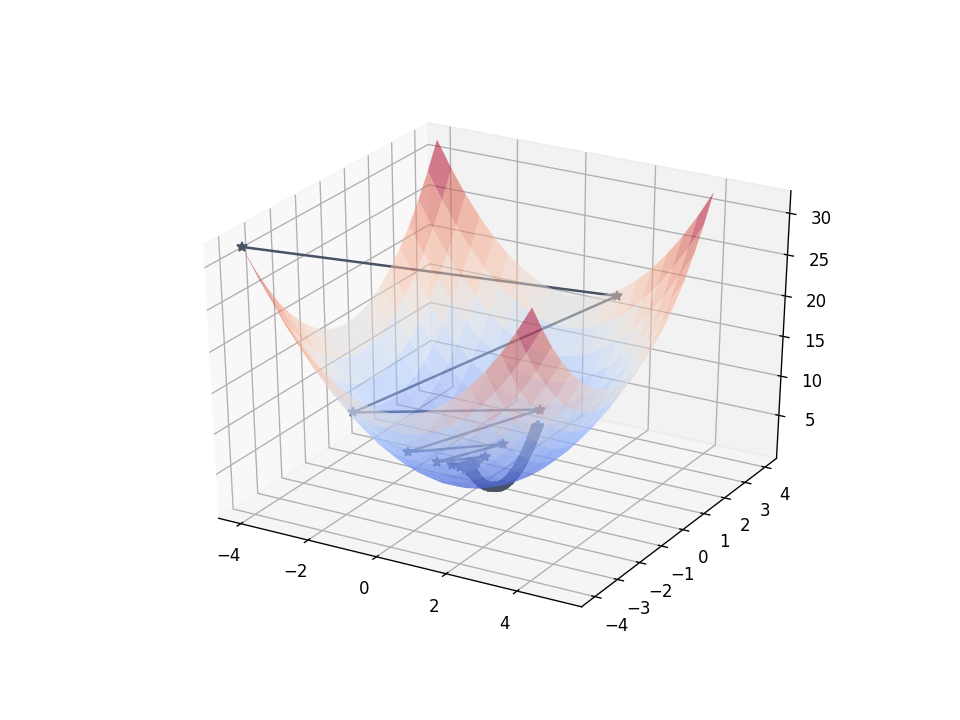

In [51]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.gca(projection='3d')

x, y = np.meshgrid(np.linspace(-4.0, 4.0, 20), np.linspace(-4.0, 4.0, 20))
ax.plot_surface(x, y, f(x,y), cmap=cm.coolwarm, alpha=0.5)
ax.plot(opt_way[:,0], opt_way[:,1], f(opt_way[:,0], opt_way[:,1]), '*-',color='#495165')

plt.show()

## Example of fitting a line to a set of points.

The line is defined as y = mx+b. The parameters we want to find are: m and b.
We are going to find the next configuration of (m,b) by looking at the gradient of the error function
$$F = \sum (y_i - (mx_i+b))^2$$
$$F'_m = 2\sum (y_i - (mx_i+b))* (-x_i)$$
$$F'_b = 2\sum (y_i - (mx_i+b))* (-1)$$

In [16]:
# some synthetic data
p_x = np.array([2, 2.3, 3.1, 5, 5, 6.8, 7.1])
p_y = np.array([2, 4.2, 3,  2, 4.5, 4., 6])


def errorFunction_F(x, y, m, b):
    # Error function. This function will be used for plotting only   
    y_exp = m * x + b;
    value = np.sum(np.square(y - y_exp))
    return value

def Jacobian(x, y, m, b):
    y_exp = m * x + b;
    J_m = 2 * np.sum(np.multiply(y - y_exp, -x));
    J_b = -2 * np.sum(y - y_exp);
    return np.array([J_m, J_b])


alpha = 0.005;
error = 1000;
p_prev = [-4, -4];
opt_way = [];
opt_way.append(p_prev)
numOfIter = 0;
while (error >1e-05):
    step =  -alpha *Jacobian(p_x, p_y, p_prev[0], p_prev[1])
    p_opt = p_prev + step; 
    error  = np.linalg.norm(p_prev - p_opt); # difference between parameter estimates
    p_prev = p_opt;
    opt_way.append(p_opt)
    numOfIter+=1;

print("Converged with ", numOfIter, "iterations\n")
opt_way = np.array(opt_way)



Converged with  816 iterations



In [17]:
# Small unit tests to check the Jacobians
x = np.array([1,2])
y = np.array([1,2])
m = 1
b = 1

v = errorFunction_F(x, y, m, b)
print("Expected F value is 2, actual value is ", v)
[J_m, J_b] = Jacobian(x, y, m, b)
print("Expected J_m value is 6, actual value is ", J_m)
print("Expected J_b value is 4, actual value is ", J_b)


Expected F value is 2, actual value is  2
Expected J_m value is 6, actual value is  6
Expected J_b value is 4, actual value is  4


<IPython.core.display.Javascript object>


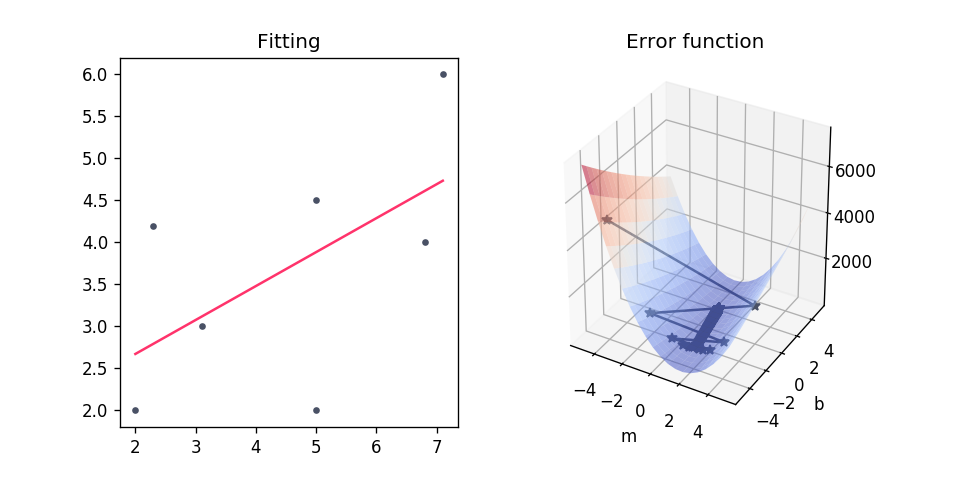

In [52]:
from matplotlib import cm 

def plotErrorConvergence(axis):
    ## plotting whole error function F
    m, b = np.meshgrid(np.linspace(np.min(-5.0), np.max(5.0), 20), np.linspace(np.min(-5.0),np.max(5.0), 20))
    F_values  = np.zeros(m.shape)
    for i in range(m.shape[0]):
        for j in range(m.shape[1]):   
            F_values[i][j] = errorFunction_F(p_x,p_y, m[i][j], b[i][j])
    # ax.plot_surface(x, y, f(x,y), cmap='plasma')
#     axis.plot_wireframe(m, b, F_values,cmap='plasma')
    
    axis.plot_surface(m, b, F_values, cmap=cm.coolwarm, alpha=0.5)
#     cset = axis.contour(m, b, F_values, zdir='z', offset=-5, cmap=cm.coolwarm)
#     cset = axis.contour(m, b, F_values, zdir='x', offset=4, cmap=cm.coolwarm)
#     cset = axis.contour(m, b, F_values, zdir='y', offset=4, cmap=cm.coolwarm)


    ## plotting optimization steps
    opt_F_values = np.zeros(opt_way.shape[0])
    for i in range(opt_way.shape[0]):
        opt_F_values[i] = errorFunction_F(p_x, p_y, opt_way[i,0], opt_way[i,1])

    axis.plot(opt_way[:,0], opt_way[:,1], opt_F_values, '*-',color='#495165')
    plt.xlabel('m')
    plt.ylabel('b')
    return

def plotFitting(axis, m, b):
    axis.plot(p_x, p_y, '.', color='#495165') # plotting data points
    x_plot = np.linspace(np.min(p_x), np.max(p_x), 20)
    y_plot = m * x_plot + b;
    axis.plot(x_plot, y_plot, '-', color='#ff336b')
    return

fig = plt.figure(figsize=(8,4))
ax_left = plt.subplot(1, 2, 1)
ax_right = plt.subplot(122, projection='3d')
plotErrorConvergence(ax_right);
ax_right.title.set_text("Error function")

plotFitting(ax_left, opt_way[-1,0], opt_way[-1,1]);
ax_left.title.set_text("Fitting")

plt.show()